<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>



<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/GeoDataFrame_SpatialOperation/blob/main/GeoDF_Operations.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Basic spatial operations in  Geo Dataframes

We will review some important operations for geodataframes.

Let's remember the contents of the world map from last session:

<a class="anchor" id="0"></a>

In [2]:
linkWorldMap="https://github.com/efra430/Trabajo-grupal1/raw/refs/heads/main/Maps/worldMaps.gpkg"

import geopandas as gpd
from  fiona import listlayers
listlayers(linkWorldMap)

['countries', 'rivers', 'cities', 'indicators']

Let's open all the layers (this takes a minute):

In [3]:
countries=gpd.read_file(linkWorldMap,layer='countries')
rivers=gpd.read_file(linkWorldMap,layer='rivers')
cities=gpd.read_file(linkWorldMap,layer='cities')
indicators=gpd.read_file(linkWorldMap,layer='indicators')

### Exercise 1
<div class="alert-success">

You will make two maps:
1. Plot your country as the background. Use **cx** to plot the cities (or other points - i.e. airports) below the centroid.
2. Plot your country as the background. Select with **cx** all the first administrative divisions above the centroid. Then, use clip to show the rivers that cross those divisions.
    
</div>

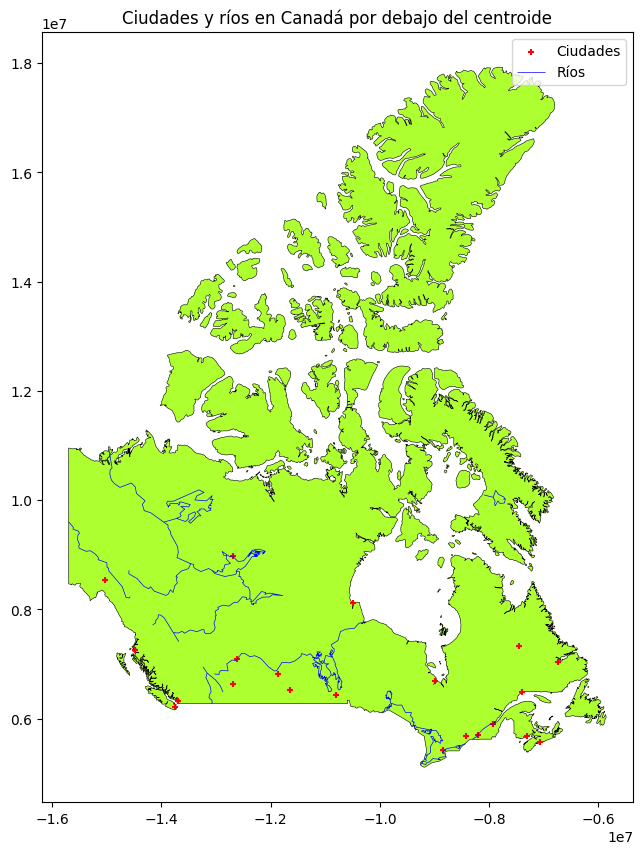

In [27]:
canada=countries[countries['COUNTRY']=='Canada']
rivers_canada_clipped = gpd.clip(rivers.to_crs(canada.crs), canada)

canada_3857=canada.to_crs(3857)
cities_canada_3857=cities[cities.COUNTRY=='Canada'].to_crs(3857)
rivers_canada_3857=rivers_canada_clipped.to_crs(canada_3857.crs)

canada_centroid = canada_3857.geometry.centroid.iloc[0]
cities_below_centroid = cities_canada_3857[cities_canada_3857.geometry.y < canada_centroid.y]
rivers_below_centroid = rivers_canada_3857[rivers_canada_3857.geometry.centroid.y < canada_centroid.y]

# Crear el mapa base con Canadá y agregar las ciudades y ríos
base = canada_3857.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4, figsize=(10,10))
cities_below_centroid.plot(ax=base, marker='+', color='red', markersize=15, label='Ciudades')
rivers_below_centroid.plot(ax=base, edgecolor='blue', linewidth=0.5, label='Ríos')
base.set_title("Ciudades y ríos en Canadá por debajo del centroide")
base.legend()


C:\Users\migue\AppData\Local\Temp\ipykernel_25960\1186873989.py:7: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  rivers_above_centroid.plot(ax=base, edgecolor='blue', linewidth=0.5, label='Ríos')


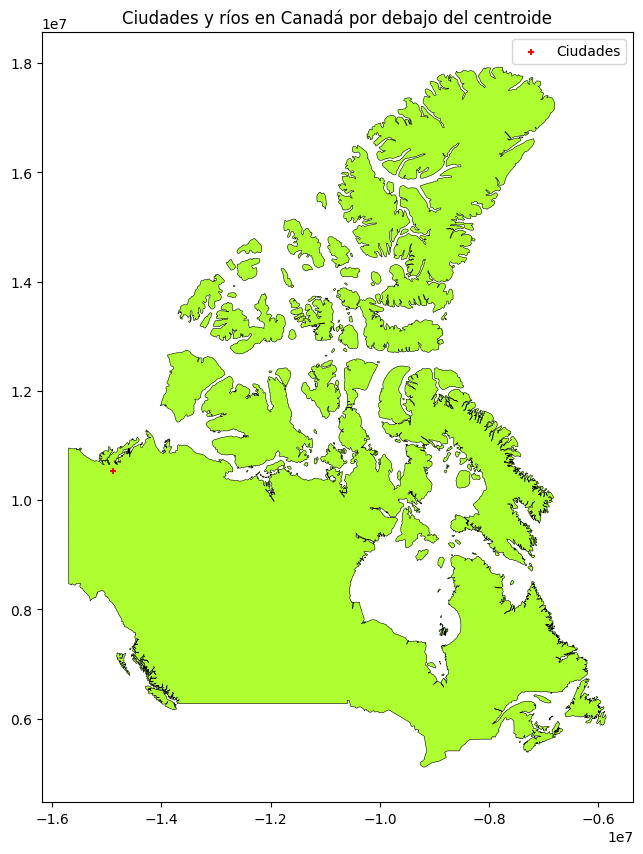

In [ ]:
cities_above_centroid = cities_canada_3857[cities_canada_3857.geometry.y > canada_centroid.y]
rivers_above_centroid = rivers_canada_3857[rivers_canada_3857.geometry.centroid.y > canada_centroid.y]

# Crear el mapa base con Canadá y agregar las ciudades y ríos
base = canada_3857.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4, figsize=(10,10))
cities_above_centroid.plot(ax=base, marker='+', color='red', markersize=15, label='Ciudades')
rivers_above_centroid.plot(ax=base, edgecolor='blue', linewidth=0.5, label='Ríos')
base.set_title("Ciudades y ríos en Canadá por debajo del centroide")
base.legend()

#Parece que no hay ríos encima del centroide. Esto se verifica con lo que se puede ver en el apartado superior y la Tarea Grupal 1

## Exercise 2


<div class="alert-success">

1. Create some subset of polygons with your country data at the municipal (or similar level). Use Unary UNION with those  polygons, and create a geoDF with the result.
2. Dissolve your municipalities by another higher level administrative level. Plot the result.
    
</div>

[TOC](#0)

_____________


<a class="anchor" id="3"></a>

# Combining GeoDF rows

Let me bring the projected data from Canada.

In [7]:
Linkcanada="https://github.com/efra430/Trabajo-grupal1/raw/refs/heads/main/Maps/canadaMaps_3348.gpkg"
## we have
listlayers(Linkcanada)

['country', 'cities', 'rivers', 'airports', 'states', 'municipalities']

Let me open municipalities:

<Axes: >

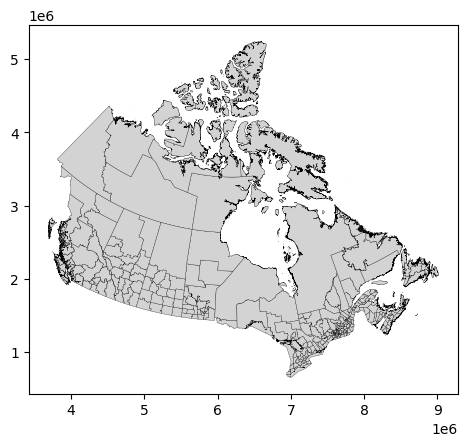

In [8]:
canada_municipalities=gpd.read_file(Linkcanada,layer='municipalities')
canada_municipalities.plot(facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [9]:
#see
canada_municipalities.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,CAN.1.11_1,CAN,Canada,CAN.1_1,Alberta,NA,Division No. 1,NA,NA,Census Division,Census Division,01,CA.AB.ON,"MULTIPOLYGON (((4839220.61 1632362.668, 483848..."
1,CAN.1.1_1,CAN,Canada,CAN.1_1,Alberta,NA,Division No. 10,NA,NA,Census Division,Census Division,10,CA.AB.TE,"MULTIPOLYGON (((4869362.411 2088564.645, 48693..."
2,CAN.1.2_1,CAN,Canada,CAN.1_1,Alberta,NA,Division No. 11,NA,NA,Census Division,Census Division,11,CA.AB.EL,"MULTIPOLYGON (((4819956.633 2117184.873, 48203..."
3,CAN.1.3_1,CAN,Canada,CAN.1_1,Alberta,NA,Division No. 12,NA,NA,Census Division,Census Division,12,CA.AB.TV,"MULTIPOLYGON (((4983936.764 2138736.671, 49834..."
4,CAN.1.4_1,CAN,Canada,CAN.1_1,Alberta,NA,Division No. 13,NA,NA,Census Division,Census Division,13,CA.AB.TN,"MULTIPOLYGON (((4744807.337 2203265.298, 47448..."


In [31]:
## we have
len(canada_municipalities.geometry)

293

In [32]:
# higher level count
len(set(canada_municipalities.NAME_1))

13

Then, this is Alberta:

<Axes: >

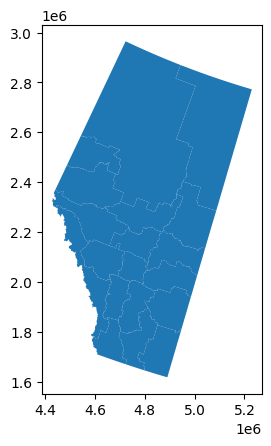

In [33]:
canada_municipalities[canada_municipalities.NAME_1=='Alberta'].plot()

Let's see the options to combine:

## Unary UNION

We can combine all these polygons into one:

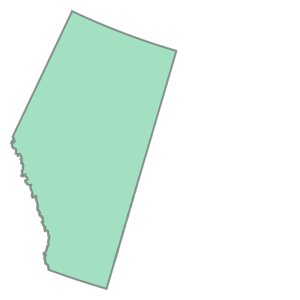

In [34]:
canada_municipalities[canada_municipalities.NAME_1=='Alberta'].union_all()

Let's save that result:

In [35]:
Alberta_union=canada_municipalities[canada_municipalities.NAME_1=='Alberta'].union_all()

In [36]:
# what do we have?
type(Alberta_union)

shapely.geometry.polygon.Polygon

You can turn that shapely object into a GeoDF like this:

In [37]:
gpd.GeoDataFrame(index=[0],data={'NAME_1':'Alberta'},
                 crs=canada_municipalities.crs,
                 geometry=[Alberta_union])

,NAME_1,geometry
0,Alberta,"POLYGON ((4722837.798 1669630.998, 4721000.71 ..."


<a class="anchor" id="21"></a>

## Dissolve

### a. Dissolve as Union
Using  **dissolve** is an alternative to _UNION_:

<Axes: >

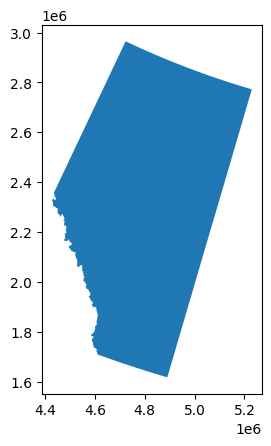

In [38]:
canada_municipalities[canada_municipalities.NAME_1=='Alberta'].dissolve().plot()

Let me save the result, and see the type :

In [39]:
Alberta_dissolve=canada_municipalities[canada_municipalities.NAME_1=='Alberta'].dissolve()

# we got?
type(Alberta_dissolve)

geopandas.geodataframe.GeoDataFrame

You got a GEOdf this time:

In [40]:
## see
Alberta_dissolve

,geometry,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
0,"POLYGON ((4722837.798 1669630.998, 4721000.71 ...",CAN.1.11_1,CAN,Canada,CAN.1_1,Alberta,NA,Division No. 1,NA,NA,Census Division,Census Division,01,CA.AB.ON


In [41]:
# keeping what is relevant
Alberta_dissolve.drop(columns=['NL_NAME_1','VARNAME_2','NL_NAME_2'],inplace=True)

# then
Alberta_dissolve

,geometry,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
0,"POLYGON ((4722837.798 1669630.998, 4721000.71 ...",CAN.1.11_1,CAN,Canada,CAN.1_1,Alberta,Division No. 1,Census Division,Census Division,01,CA.AB.ON


### b. Dissolve for groups

Using _dissolve()_ with no arguments returns the union of the polygons, BUT also you get a GEOdf.
However, if you have a column that represents a grouping (as we do), you can dissolve by that column:

<Axes: >

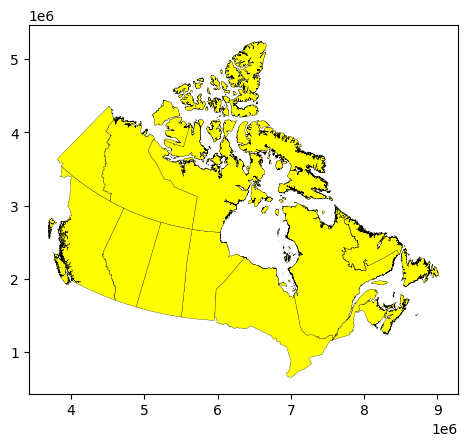

In [42]:
# dissolving
canada_municipalities.dissolve(by='NAME_1').plot(facecolor='yellow', edgecolor='black',linewidth=0.2)

Again, let me save this result:

In [43]:
canada_NAME_1_diss=canada_municipalities.dissolve(by='NAME_1')

We know we have a GeoDF; let's see contents:

In [44]:
canada_NAME_1_diss

,geometry,GID_2,GID_0,COUNTRY,GID_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
NAME_1,,,,,,,,,,,,,
Alberta,"POLYGON ((4722837.798 1669630.998, 4721000.71 ...",CAN.1.11_1,CAN,Canada,CAN.1_1,NA,Division No. 1,NA,NA,Census Division,Census Division,01,CA.AB.ON
British Columbia,"MULTIPOLYGON (((3700664.469 2544332.934, 37006...",CAN.2.1_1,CAN,Canada,CAN.2_1,NA,Alberni-Clayoquot,NA,NA,Regional District,Regional District,23,CA.BC.AC
Manitoba,"MULTIPOLYGON (((5775036.164 1448492.51, 577481...",CAN.3.11_1,CAN,Canada,CAN.3_1,NA,Division No. 1,NA,NA,Census Division,Census Division,01,CA.MB.ON
New Brunswick,"MULTIPOLYGON (((8149709.708 1359935.797, 81497...",CAN.4.1_1,CAN,Canada,CAN.4_1,NA,Albert,NA,NA,County,County,06,CA.NB.AL
Newfoundland and Labrador,"MULTIPOLYGON (((7904934.33 2739955.22, 7904790...",CAN.5.3_1,CAN,Canada,CAN.5_1,NA,Division No. 1,NA,NA,Census Division,Census Division,01,CA.NF.ON
Northwest Territories,"MULTIPOLYGON (((4608912.448 4112960.359, 46089...",CAN.6.1_1,CAN,Canada,CAN.6_1,NA,Fort Smith,NA,NA,Region,Region,06,CA.NT.FS
Nova Scotia,"MULTIPOLYGON (((8284965.008 1240923.679, 82848...",CAN.7.1_1,CAN,Canada,CAN.7_1,NA,Annapolis,NA,NA,County,County,05,CA.NS.AP
Nunavut,"MULTIPOLYGON (((5520123.335 3447667.411, 55200...",CAN.8.1_1,CAN,Canada,CAN.8_1,NA,Baffin,Qikiqtaaluk,NA,Region,Region,04,CA.NU.QK
Ontario,"MULTIPOLYGON (((6266578.496 1342650.196, 62665...",CAN.9.1_1,CAN,Canada,CAN.9_1,NA,Algoma,NA,NA,District,District,57,CA.ON.AL


Again, we can drop columns that do not bring important information:

In [45]:
canada_NAME_1_diss.drop(columns=['VARNAME_2','NL_NAME_1','NL_NAME_2'],inplace=True)
canada_NAME_1_diss.reset_index(inplace=True)
canada_NAME_1_diss.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   NAME_1     13 non-null     object  
 1   geometry   13 non-null     geometry
 2   GID_2      13 non-null     object  
 3   GID_0      13 non-null     object  
 4   COUNTRY    13 non-null     object  
 5   GID_1      13 non-null     object  
 6   NAME_2     13 non-null     object  
 7   TYPE_2     13 non-null     object  
 8   ENGTYPE_2  13 non-null     object  
 9   CC_2       13 non-null     object  
 10  HASC_2     13 non-null     object  
dtypes: geometry(1), object(10)
memory usage: 1.2+ KB


## Exercise 2


<div class="alert-success">

1. Create some subset of polygons with your country data at the municipal (or similar level). Use Unary UNION with those  polygons, and create a geoDF with the result.
2. Dissolve your municipalities by another higher level administrative level. Plot the result.
    
</div>

### c. Dissolve and aggregate

In pandas, you have can aggregate data using some statistics. Dissolve can be used in the same way. Let me use the _indicators_ layer:

In [46]:
indicators.head()

,COUNTRY,Officialstatename,InternetccTLD,iso2,iso3,fragility_date,fragility,co2,co2_date,region,ForestRev_gdp,ForestRev_date,fragility_Qt,fragility_Qt_jc5,fragility_Qt_jc5_cat,geometry
0,ANTIGUA AND BARBUDA,Antigua and Barbuda,.ag,AG,ATG,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018,-0.530113,1,1_Good,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
1,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018,1.827146,4,4_Poor,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
2,ALGERIA,The People's Democratic Republic of Algeria,.dz,DZ,DZA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018,0.304520,3,3_Bad,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
3,AZERBAIJAN,The Republic of Azerbaijan,.az,AZ,AZE,2019,73.2,35389000.0,2019,MIDDLE EAST,0.02,2018,0.233695,2,2_Middle,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
4,ALBANIA,The Republic of Albania,.al,AL,ALB,2019,58.9,3794000.0,2019,EUROPE,0.18,2018,-0.424447,1,1_Good,"MULTIPOLYGON (((20.79192 40.43154, 20.78722 40..."


We have numerical columns, and a grouping column named _region_. Let's get some averages by region, while combining the polygons:

In [47]:
indicators.dissolve(
     by="region",
     aggfunc={
         "COUNTRY": "count",
         "fragility": ["mean"],
         "co2": ["mean"],
         "ForestRev_gdp": ["mean"]
     },as_index=False,
 )

,region,geometry,"(COUNTRY, count)","(fragility, mean)","(co2, mean)","(ForestRev_gdp, mean)"
0,AFRICA,"MULTIPOLYGON (((-2.92813 5.10022, -2.93222 5.1...",51,85.664706,1.670835e+07,3.239804
1,AUSTRALIA AND OCEANIA,"MULTIPOLYGON (((-176.51779 -43.90778, -176.532...",6,55.100000,7.679500e+07,3.630000
2,CENTRAL AMERICA AND THE CARIBBEAN,"MULTIPOLYGON (((-81.71556 7.44681, -81.71362 7...",16,62.993750,1.104856e+07,0.359375
3,CENTRAL ASIA,"MULTIPOLYGON (((50.03472 45.04833, 50.0425 45....",6,72.883333,3.898807e+08,0.236667
4,EAST AND SOUTHEAST ASIA,"MULTIPOLYGON (((105.26361 -6.54472, 105.26138 ...",15,64.120000,9.608337e+08,0.586667
5,EUROPE,"MULTIPOLYGON (((-18.13223 27.77264, -18.1132 2...",39,40.348718,9.866674e+07,0.199231
6,MIDDLE EAST,"MULTIPOLYGON (((42.76819 14.06653, 42.7868 14....",16,71.756250,1.583754e+08,0.032500
7,NORTH AMERICA,"MULTIPOLYGON (((-155.211 20.00166, -155.18335 ...",3,42.566667,2.073395e+09,0.073333
8,SOUTH AMERICA,"MULTIPOLYGON (((-74.93431 -51.85501, -74.93251...",11,61.436364,8.613718e+07,1.064545
9,SOUTH ASIA,"MULTIPOLYGON (((73.10193 -0.58431, 73.09915 -0...",8,83.975000,3.309434e+08,0.365000


Let me save and plot:

<Axes: >

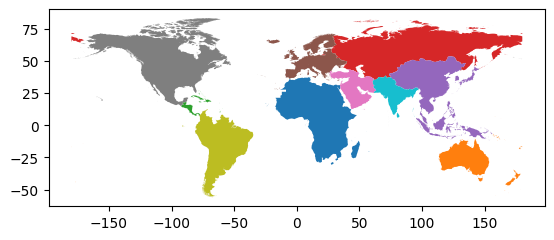

In [48]:
indicatorsByRegion=indicators.dissolve(
     by="region",
     aggfunc={
         "COUNTRY": "count",
         "fragility": ["mean"],
         "co2": ["mean"],
         "ForestRev_gdp": ["mean"]
     },as_index=False,
 )


indicatorsByRegion.plot(column = 'region')

Without renaming, you can request a choropleth:

<Axes: >

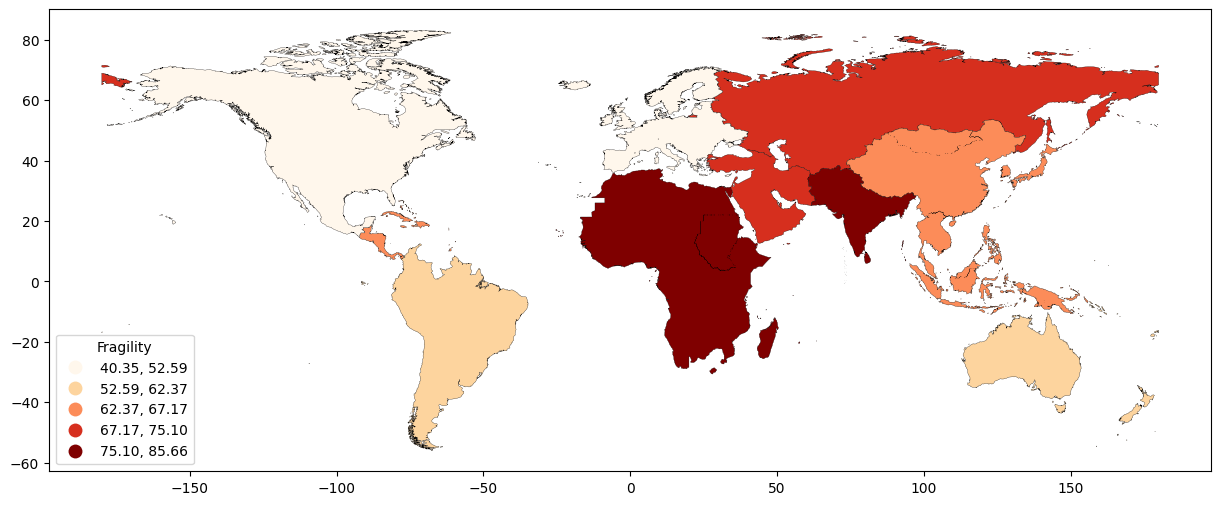

In [49]:
indicatorsByRegion.plot(column =('fragility', 'mean'),scheme='quantiles', cmap='OrRd',
                        legend=True,
                        legend_kwds={"title": "Fragility",'loc': 'lower left'},
                        edgecolor='black',linewidth=0.2,
                        figsize=(15, 10))

[TOC](#0)
_____________


<a class="anchor" id="4"></a>

# The convex hull

Some time you may have the need to create a polygon that serves as an envelope to a set of points.

For this example, let me compute the centroid coordinates:

In [50]:
canada_3348=gpd.read_file(Linkcanada,layer='country')
canada_3348.centroid

0    POINT (5972150.368 2686371.781)
dtype: geometry

In [51]:
# then
canada_3348.centroid.x.values[0],canada_3348.centroid.y.values[0]

(np.float64(5972150.368377435), np.float64(2686371.78053789))

Let me open the airports:

In [52]:
airports_3348=gpd.read_file(Linkcanada,layer='airports')
airports_3348.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Vancouver International Airport,large_airport,49.193901,-123.183998,14.0,British Columbia,Vancouver,POINT (4010116.018 2000814.043)
1,Montreal / Pierre Elliott Trudeau Internationa...,large_airport,45.467837,-73.742294,118.0,Quebec,Montréal,POINT (7619517.695 1237036.43)
2,Calgary International Airport,large_airport,51.118822,-114.009933,3557.0,Alberta,Calgary,POINT (4692351.97 1928851.296)
3,Ottawa Macdonald-Cartier International Airport,large_airport,45.322498,-75.669197,374.0,Ontario,Ottawa,POINT (7476211.185 1180388.411)
4,Billy Bishop Toronto City Centre Airport,medium_airport,43.627499,-79.396202,252.0,Ontario,Toronto,POINT (7224334.04 925620.018)


Now, let me plot some airports, using the centroid:

In [53]:
# coordinates
centroidX,centroidY=canada_3348.centroid.x.values[0],canada_3348.centroid.y.values[0]

# subsets of medium airports
Canada_AirTopLeft=airports_3348[airports_3348.kind=='medium_airport'].cx[:centroidX,centroidY:]
Canada_AirTopRight=airports_3348[airports_3348.kind=='medium_airport'].cx[centroidX:,centroidY:]
Canada_AirBottomLeft=airports_3348[airports_3348.kind=='medium_airport'].cx[:centroidX,:centroidY]
Canada_AirBottomRight=airports_3348[airports_3348.kind=='medium_airport'].cx[centroidX:,:centroidY]

Let me plot the subsets:

<Axes: >

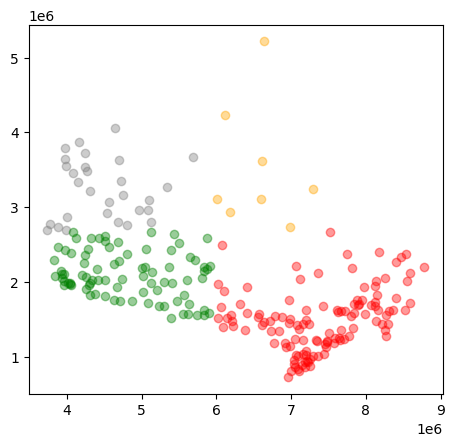

In [54]:
base=Canada_AirTopLeft.plot(facecolor='grey', alpha=0.4)
Canada_AirTopRight.plot(ax=base,facecolor='orange', alpha=0.4)
Canada_AirBottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
Canada_AirBottomRight.plot(ax=base,facecolor='red', alpha=0.4)

Notice we have simple points in each subset:

In [55]:
Canada_AirBottomLeft

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
9,Victoria International Airport,medium_airport,48.647201,-123.427792,63.0,British Columbia,Victoria,POINT (3965531.301 1955755.548)
12,Kelowna International Airport,medium_airport,49.956100,-119.377998,1421.0,British Columbia,Kelowna,POINT (4293621.089 1953960.02)
14,Regina International Airport,medium_airport,50.431900,-104.666000,1894.0,Saskatchewan,Regina,POINT (5301504.458 1678526.852)
15,Saskatoon John G. Diefenbaker International Ai...,medium_airport,52.170799,-106.699997,1653.0,Saskatchewan,Saskatoon,POINT (5205475.584 1896175.399)
23,Abbotsford International Airport,medium_airport,49.025299,-122.361000,195.0,British Columbia,Abbotsford,POINT (4054473.868 1956192.115)
...,...,...,...,...,...,...,...,...
624,Pikwitonei Airport,medium_airport,55.588902,-97.164200,630.0,Manitoba,Pikwitonei,POINT (5873137.907 2167683.375)
625,Thicket Portage Airport,medium_airport,55.318901,-97.707802,678.0,Manitoba,Thicket Portage,POINT (5836985.662 2141285.683)
773,Nejanilini Lake Airport,medium_airport,59.487499,-97.780296,1000.0,Manitoba,Nejanilini Lake,POINT (5874563.597 2592900.684)
1144,Jenpeg Airport,medium_airport,54.518902,-98.046097,729.0,Manitoba,Jenpeg,POINT (5807548.95 2056294.21)


In this situation, you can NOT make a _convex hull_:

<Axes: >

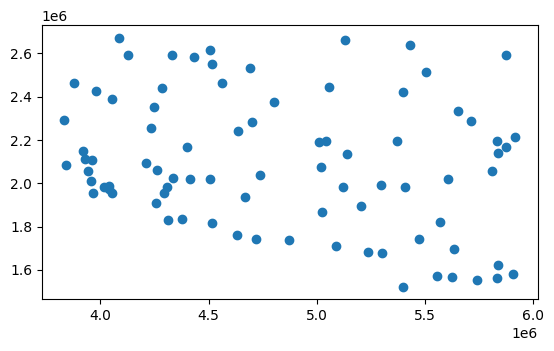

In [56]:
Canada_AirBottomLeft.convex_hull.plot()

You first need to **dissolve**, and then you create a hull, an envelope of  convex angles:

<Axes: >

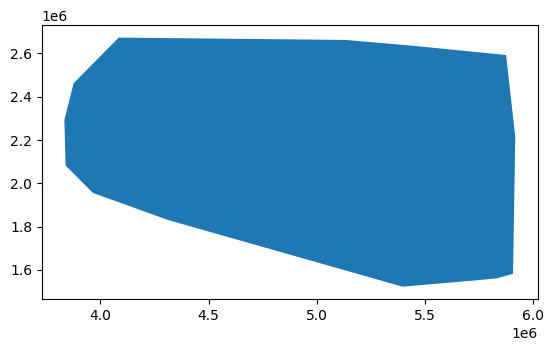

In [57]:
Canada_AirBottomLeft.dissolve().convex_hull.plot()

As we saw, the convex hull is a polygon:

In [58]:
Canada_AirBottomLeft.dissolve().convex_hull

0    POLYGON ((5396016.663 1522691.998, 4312959.146...
dtype: geometry

What if we the polygons had not been previously combined?

<Axes: >

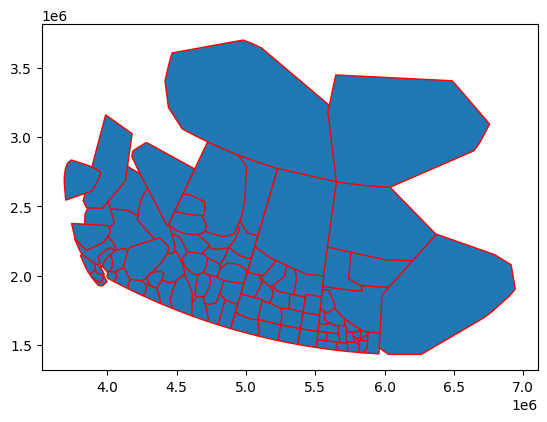

In [59]:
canada_municipalities.cx[:centroidX,:centroidY].convex_hull.plot(edgecolor='red')

That is, you get a convex hull for each geometry.

We can also use _union_ before creating a convex hull:

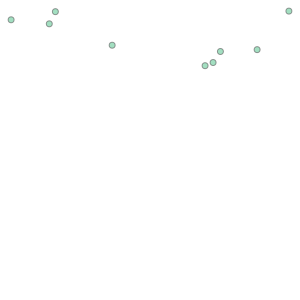

In [60]:
# just the union
large_airport=airports_3348[airports_3348.kind=='large_airport']
large_airport.union_all()

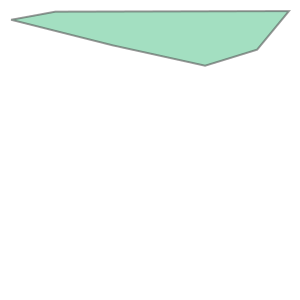

In [61]:
# hull of the union
large_airport.union_all().convex_hull

Let's turn the GS into a GDF:

In [62]:
LargeAirport_hull= gpd.GeoDataFrame(index=[0],
                                    crs=large_airport.crs,
                                    geometry=[large_airport.union_all().convex_hull])
LargeAirport_hull['name']='large airports hull' # optional

# then

LargeAirport_hull

,geometry,name
0,"POLYGON ((7476211.185 1180388.411, 5815823.889...",large airports hull


Let's use the GDF in plotting:

<Axes: >

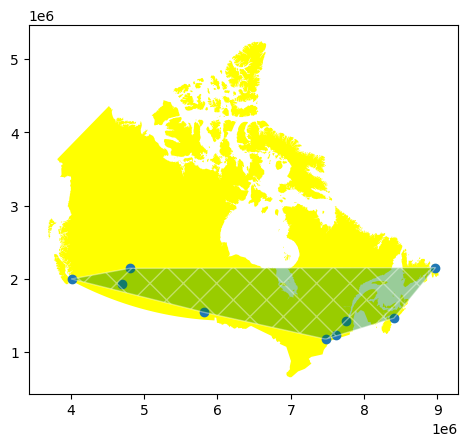

In [63]:
base=canada_3348.plot(facecolor='yellow')
large_airport.plot(ax=base)
LargeAirport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

### Exercise 3

<div class="alert-success">

1. Select some points from your maps.
    
2. Create the convex hull for those points.
    
3. Turn the hull into a GDF.
    
4. Plot the hull on top of the country.
    
</div>

[TOC](#0)
_____________

<a class="anchor" id="5"></a>
# Spatial Overlay

We might need to create or find some geometries from the geometries we already have. Using a set theory approach, we will se the use of _intersection_, _union_, _difference_, and _symmetric difference_.

Let me create this GeoDFs:

In [64]:
# the north
MunisN_canada=canada_municipalities.cx[:,centroidY:]
# the south
MunisS_canada=canada_municipalities.cx[:,:centroidY]
# the west
MunisW_canada=canada_municipalities.cx[:centroidX,:]
# the east
MunisE_canada=canada_municipalities.cx[centroidX:,:]

Let me plot:

<Axes: >

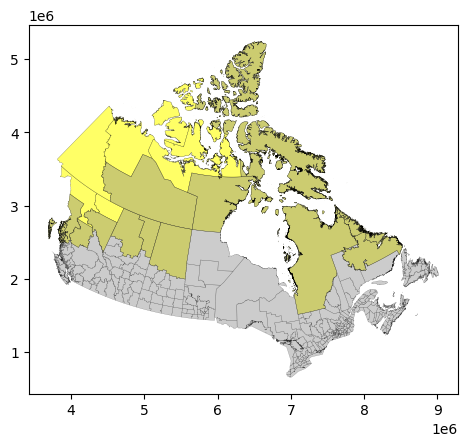

In [65]:
base=MunisN_canada.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
MunisS_canada.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base, alpha=0.4)

<Axes: >

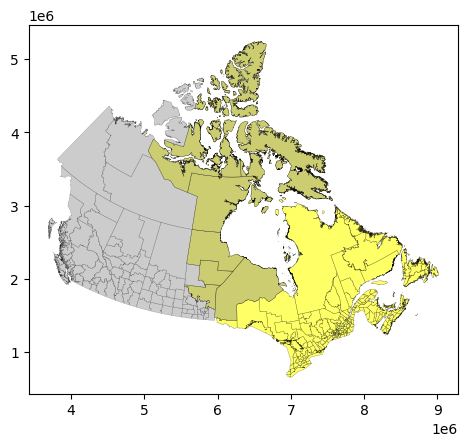

In [66]:
base=MunisE_canada.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
MunisW_canada.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base, alpha=0.4)

## Intersection

We keep what is common between GeoDFs:

<Axes: >

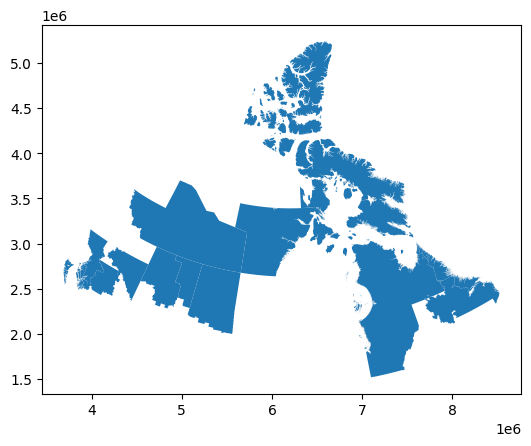

In [67]:
munisNS_canada=MunisN_canada.overlay(MunisS_canada, how="intersection",keep_geom_type=True)
munisNS_canada.plot()

This is similar to a _spatial join_:

<Axes: >

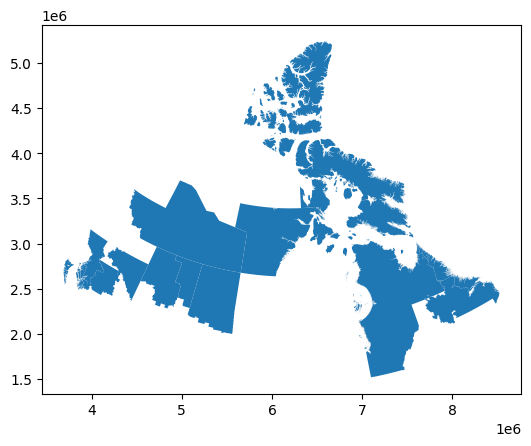

In [68]:
MunisN_canada.sjoin(MunisS_canada, how="inner", predicate='contains').plot()

<Axes: >

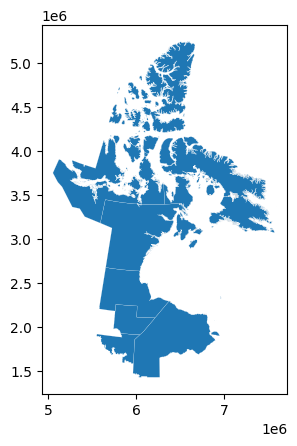

In [69]:
# keeping the overlay
munisWE_canada=MunisW_canada.overlay(MunisE_canada, how="intersection",keep_geom_type=True)
munisWE_canada.plot(edgecolor='white',linewidth=0.1)

## Union

Let me unite the previous two GeoDFs. First, take a look at each one:

In [70]:
munisNS_canada.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   GID_2_1      13 non-null     object  
 1   GID_0_1      13 non-null     object  
 2   COUNTRY_1    13 non-null     object  
 3   GID_1_1      13 non-null     object  
 4   NAME_1_1     13 non-null     object  
 5   NL_NAME_1_1  13 non-null     object  
 6   NAME_2_1     13 non-null     object  
 7   VARNAME_2_1  13 non-null     object  
 8   NL_NAME_2_1  13 non-null     object  
 9   TYPE_2_1     13 non-null     object  
 10  ENGTYPE_2_1  13 non-null     object  
 11  CC_2_1       13 non-null     object  
 12  HASC_2_1     13 non-null     object  
 13  GID_2_2      13 non-null     object  
 14  GID_0_2      13 non-null     object  
 15  COUNTRY_2    13 non-null     object  
 16  GID_1_2      13 non-null     object  
 17  NAME_1_2     13 non-null     object  
 18  NL_NAME_1_2  13 non-null

In [74]:
munisWE_canada.info()
print(munisNS_canada.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   GID_2_1      7 non-null      object  
 1   GID_0_1      7 non-null      object  
 2   COUNTRY_1    7 non-null      object  
 3   GID_1_1      7 non-null      object  
 4   NAME_1_1     7 non-null      object  
 5   NL_NAME_1_1  7 non-null      object  
 6   NAME_2_1     7 non-null      object  
 7   VARNAME_2_1  7 non-null      object  
 8   NL_NAME_2_1  7 non-null      object  
 9   TYPE_2_1     7 non-null      object  
 10  ENGTYPE_2_1  7 non-null      object  
 11  CC_2_1       7 non-null      object  
 12  HASC_2_1     7 non-null      object  
 13  GID_2_2      7 non-null      object  
 14  GID_0_2      7 non-null      object  
 15  COUNTRY_2    7 non-null      object  
 16  GID_1_2      7 non-null      object  
 17  NAME_1_2     7 non-null      object  
 18  NL_NAME_1_2  7 non-null   

The overlay combines the geometries, but not the attributes. Let me subset and show you:

In [77]:
keep=['COUNTRY_1','NAME_1_1','NAME_2_2','geometry']
munisNS_canada=munisNS_canada.loc[:,keep]
munisWE_canada=munisWE_canada.loc[:,keep]

In [78]:
# now
munisNS_canada.overlay(munisWE_canada,how="union",keep_geom_type=True)

,COUNTRY_1_1,NAME_1_1_1,NAME_2_2_1,COUNTRY_1_2,NAME_1_1_2,NAME_2_2_2,geometry
0,Canada,Nunavut,Baffin,Canada,Nunavut,Baffin,"MULTIPOLYGON (((6955698.25 2334870.465, 695564..."
1,Canada,Nunavut,Keewatin,Canada,Nunavut,Keewatin,"MULTIPOLYGON (((6041298.34 2639414.284, 604121..."
2,Canada,Alberta,Division No. 16,NaN,NaN,NaN,"POLYGON ((5084070.609 2286586.244, 5081628.903..."
3,Canada,Alberta,Division No. 17,NaN,NaN,NaN,"POLYGON ((4873816.76 2309264.547, 4873786.13 2..."
4,Canada,British Columbia,Bulkley-Nechako,NaN,NaN,NaN,"POLYGON ((4126977.333 2471669.935, 4126956.821..."
5,Canada,British Columbia,Kitimat-Stikine,NaN,NaN,NaN,"MULTIPOLYGON (((3857153.156 2509067.115, 38571..."
6,Canada,British Columbia,Peace River,NaN,NaN,NaN,"POLYGON ((4439458.126 2365793.461, 4439227.467..."
7,Canada,British Columbia,Skeena-Queen Charlotte,NaN,NaN,NaN,"MULTIPOLYGON (((3700969.711 2544422.862, 37009..."
8,Canada,Newfoundland and Labrador,Division No. 10,NaN,NaN,NaN,"MULTIPOLYGON (((8521986.167 2449845.938, 85219..."
9,Canada,Newfoundland and Labrador,Division No. 11,NaN,NaN,NaN,"MULTIPOLYGON (((8234832.32 2485270.917, 823480..."


As you see, geometries are fine, but not attributes. It is strictly NOT appending the GeoDFs:

In [79]:
# appending
import pandas as pd

pd.concat([munisNS_canada,munisWE_canada],ignore_index=True)

,COUNTRY_1,NAME_1_1,NAME_2_2,geometry
0,Canada,Alberta,Division No. 16,"POLYGON ((5084070.609 2286586.244, 5081628.903..."
1,Canada,Alberta,Division No. 17,"POLYGON ((4873816.76 2309264.547, 4873786.13 2..."
2,Canada,British Columbia,Bulkley-Nechako,"POLYGON ((4126977.333 2471669.935, 4126956.821..."
3,Canada,British Columbia,Kitimat-Stikine,"MULTIPOLYGON (((3857153.156 2509067.115, 38571..."
4,Canada,British Columbia,Peace River,"POLYGON ((4439458.126 2365793.461, 4439227.467..."
5,Canada,British Columbia,Skeena-Queen Charlotte,"MULTIPOLYGON (((3700969.711 2544422.862, 37009..."
6,Canada,Newfoundland and Labrador,Division No. 10,"MULTIPOLYGON (((8521986.167 2449845.938, 85219..."
7,Canada,Newfoundland and Labrador,Division No. 11,"MULTIPOLYGON (((8234832.32 2485270.917, 823480..."
8,Canada,Northwest Territories,Fort Smith,"POLYGON ((5135407.464 2801652.442, 5135174.185..."
9,Canada,Nunavut,Baffin,"MULTIPOLYGON (((6955899.327 2334931.331, 69556..."


You will append if you are interested in the keeping the attributes. But you just do the overlay if you are planing to combine final results:

<Axes: >

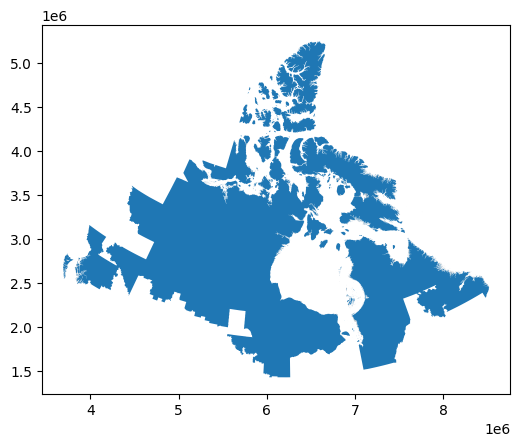

In [80]:
munisNS_canada.dissolve().overlay(munisWE_canada.dissolve(), how="union",keep_geom_type=True).dissolve().plot()

Let me create an object to save the previous result:

In [81]:
muniMidCanada=munisNS_canada.dissolve().overlay(munisWE_canada.dissolve(), how="union",keep_geom_type=True).dissolve()
muniMidCanada

,geometry,COUNTRY_1_1,NAME_1_1_1,NAME_2_2_1,COUNTRY_1_2,NAME_1_1_2,NAME_2_2_2
0,"MULTIPOLYGON (((3841850.241 2524896.292, 38417...",Canada,Alberta,Division No. 16,Canada,Manitoba,Division No. 19


In [83]:
# some cleaning

muniMidCanada['zone']='middles'
muniMidCanada=muniMidCanada.loc[:,['NAME_2_2_1','zone','geometry']]
muniMidCanada

,NAME_2_2_1,zone,geometry
0,Division No. 16,middles,"MULTIPOLYGON (((3841850.241 2524896.292, 38417..."


## Difference

Here, you keep what belongs to the GeoDF to left that is not in the GeoDF to the right:

<Axes: >

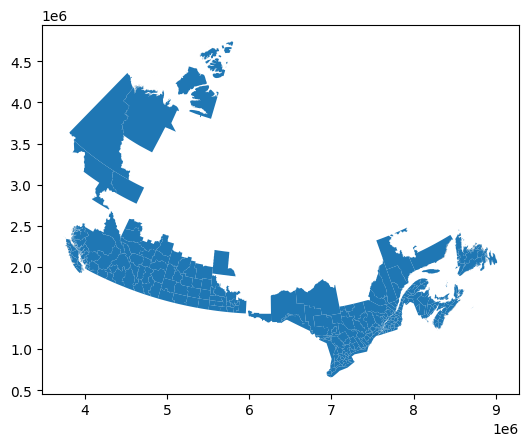

In [84]:
# with the municipalities
canada_municipalities.overlay(muniMidCanada, how='difference').plot()

## Symmetric Difference

This is the opposite to *intersection*, you keep what is not in the intersection:

<Axes: >

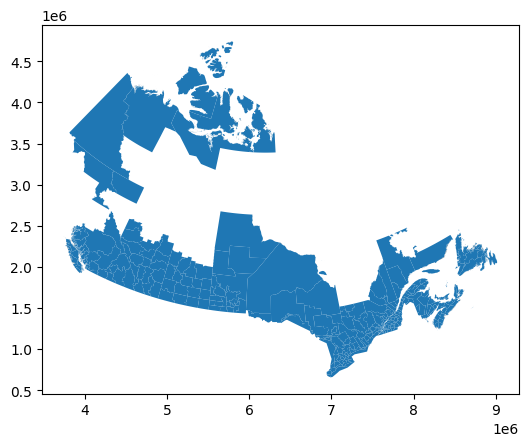

In [85]:
MunisN_canada.overlay(MunisS_canada, how="symmetric_difference",keep_geom_type=False).plot()

<Axes: >

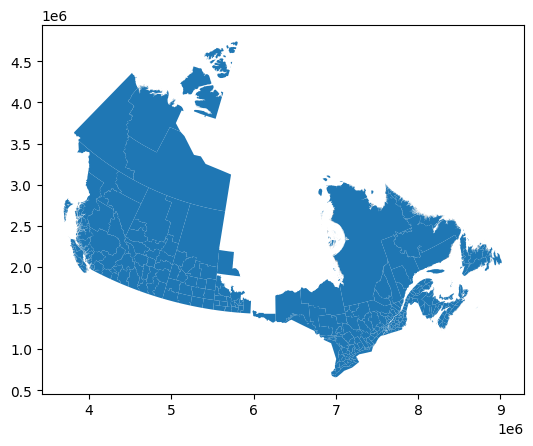

In [86]:
MunisW_canada.overlay(MunisE_canada, how="symmetric_difference",keep_geom_type=False).plot()

# Exercise 4

<div class="alert-success">

Apply two spatial overlays to your maps.

        
</div>